## Import library and data

In [41]:
import csv
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pandas import DataFrame
import datetime
import xlsxwriter
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [42]:
input_path = "rawdata"
input_files = glob.glob(os.path.join(input_path, '*.xlsx'))

In [43]:
data_list = list()

for i in range(len(input_files)):
   data_list.append(pd.read_excel(input_files[i]))

In [44]:
namelist = list()
for i in range(len(input_files)):
    split_path=input_files[i].split("_")
    name = "_".join(split_path[1:])
    name = os.path.splitext(name)[0]
    namelist.append(name)

In [45]:
data_list[0]

,Unnamed: 0,ID,PM,Title,Year,amount,class,executor,operated_by
0,0,(1345302619),김민화,유아동시교육의 우수사례 발굴 및 양질의 교육자료 수집을 바탕으로 한 교사역량개발 프...,2019,20000000,인문사회기초연구(R&D),교육부,신한대학교
1,1,(1345272879),기영화,우리나라 대학교의 해외유학생 유치와 고등교육한류 수출을 위한 한국형 온라인 공개강좌...,2017,25740000,인문사회기초연구,교육부,숭실대학교
2,2,(1345251088),기영화,우리나라 대학교의 해외유학생 유치와 고등교육한류 수출을 위한 한국형 온라인 공개강좌...,2016,25740000,인문사회기초연구,교육부,숭실대학교
3,3,(1375026804),신현철,예술교육 공급자와 수요자 매칭 서비스 모델 개발,2018,282000000,문화기술연구개발(R&D),문화체육관광부,(주)엑스아이커뮤니케이션즈
4,4,(1465026709),김연수,정밀의료 전문인력 수급현황 및 전망연구 및 유전체 정보분석 기본·심화 교육기획·운영,2018,332300000,첨단의료기술개발(R&D),보건복지부,서울대학교병원
...,...,...,...,...,...,...,...,...,...
73,161,(1711024338),조동환,화합물계 나노소자공정 실습교육과정 운영,2015,360000000,나노·소재기술개발,미래창조과학부,한국나노기술원
74,162,(1711082232),황욱중,실리콘계 나노소자공정 실습교육과정 운영,2019,300000000,나노·소재기술개발(R&D),과학기술정보통신부,나노종합기술원
75,163,(1711082812),김영관,화합물계 나노소자공정 실습교육과정 운영,2019,300000000,나노·소재기술개발(R&D),과학기술정보통신부,한국나노기술원
76,204,(1345274578),한종임,창의성 신장을 위한 영어과 교수·학습 모형 개발 및 교육적 효과 연구,2017,25740000,인문사회기초연구,교육부,이화여자대학교


In [46]:
clean_data=list()
convert_dict = {'Year': str, 
                'amount': int
               }
for i in range(len(input_files)):
    # data_list[i].drop(columns="Unnamed: 0",inplace=True)
    x = data_list[i].astype(convert_dict)
    for i, row in x.iterrows():
        x.loc[i,'amount'] = round(row['amount']/10000000,1)
        x.loc[i,'Year']= datetime.datetime.strptime(row['Year'], '%Y')
    clean_data.append(x.groupby(['Year','executor']).sum())

In [47]:
clean_data[0].groupby(['Year','executor']).sum()['amount'].unstack()

executor,과학기술정보통신부,교육부,문화체육관광부,미래창조과학부,보건복지부,산림청,산업통상자원부,중소기업청,중소벤처기업부
Year,,,,,,,,,
2015-01-01,NaN,12.3,NaN,114.7,NaN,15.0,NaN,7.1,NaN
2016-01-01,NaN,33.9,NaN,293.7,NaN,NaN,21.7,25.8,NaN
2017-01-01,128.8,39.3,NaN,NaN,0.0,NaN,6.8,NaN,35.4
2018-01-01,97.3,16.7,28.2,NaN,90.0,NaN,NaN,NaN,46.5
2019-01-01,92.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,54.5


In [48]:
for i in range(len(clean_data)):
    name_ext = 'exceldata/'+"".join((namelist[i], ".xlsx")) 
    writer = pd.ExcelWriter(name_ext, engine='xlsxwriter')
    clean_data[i].to_excel(writer, sheet_name='Sheet1')
    writer.close()

## Create lineplot

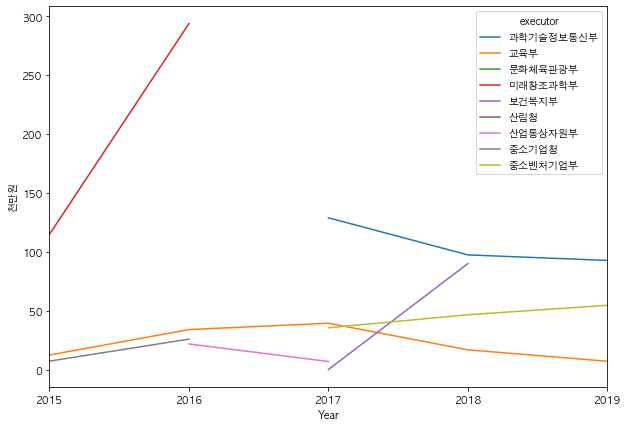

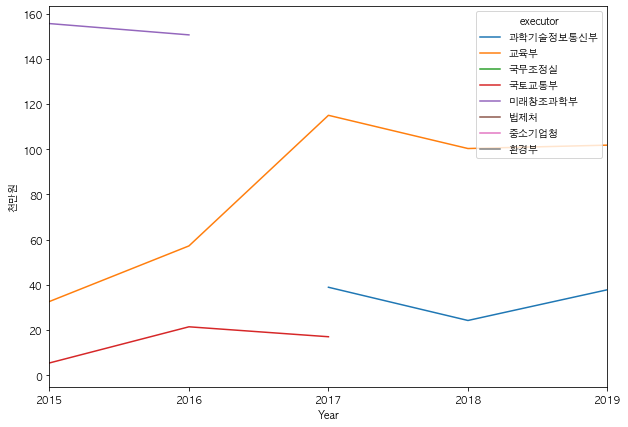

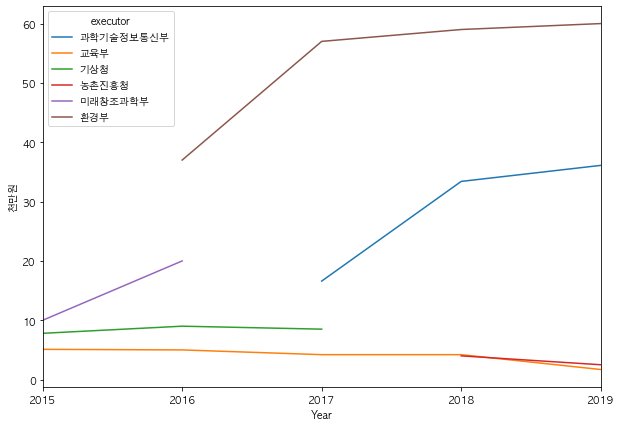

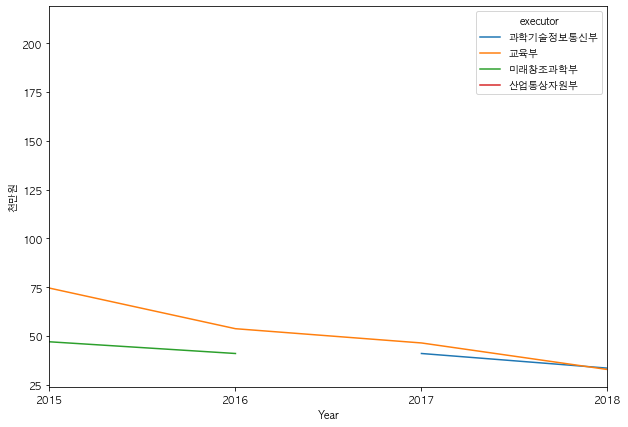

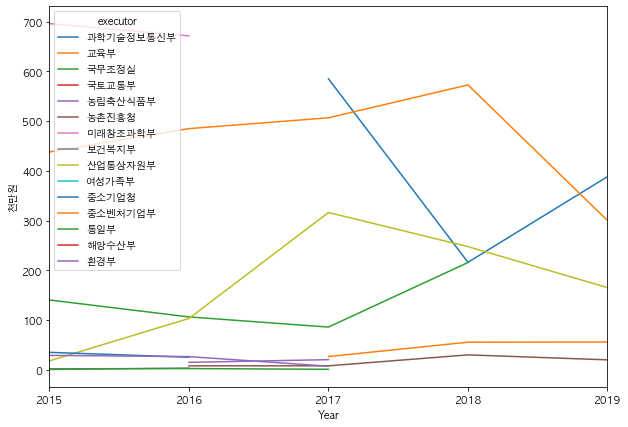

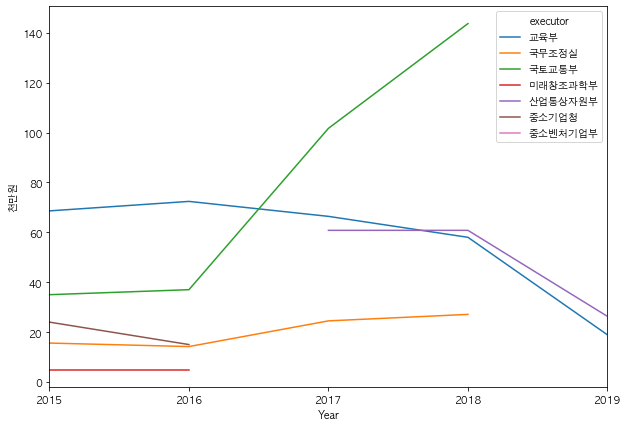

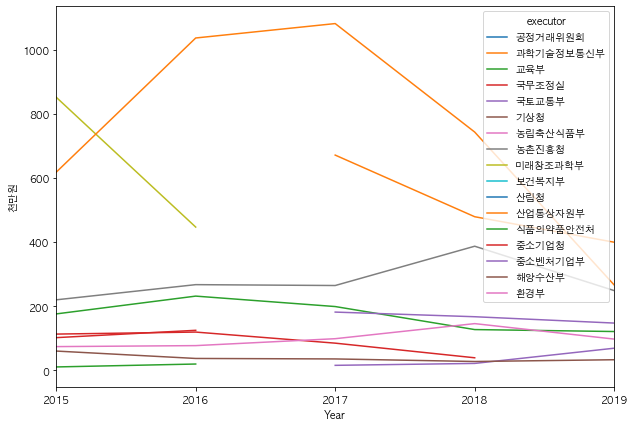

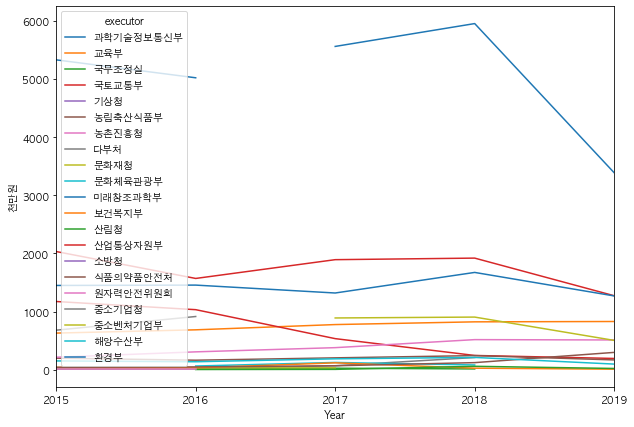

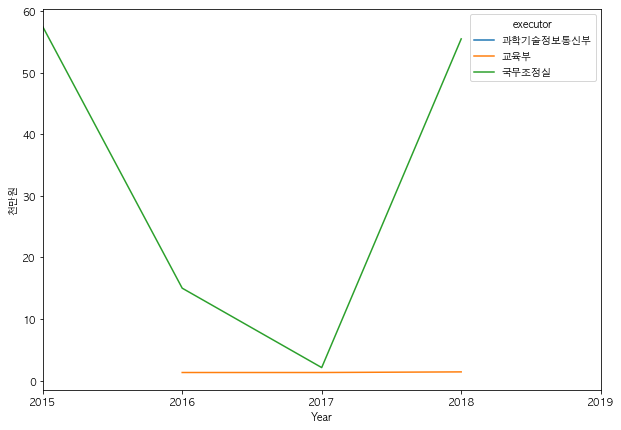

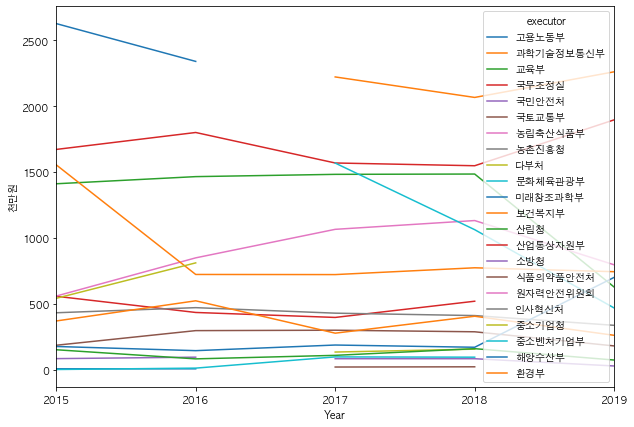

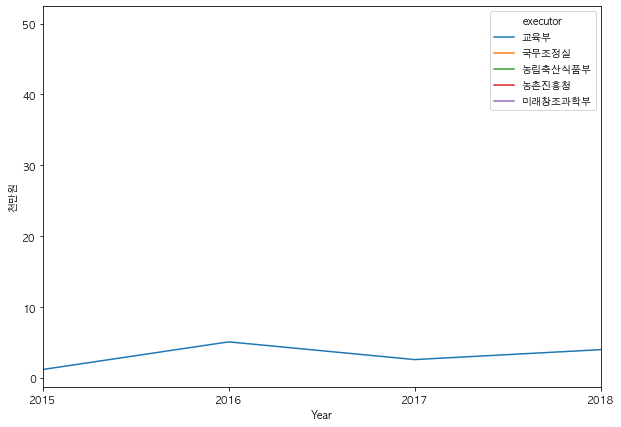

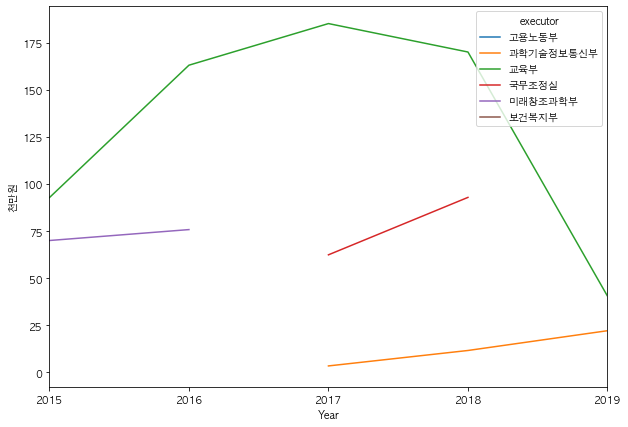

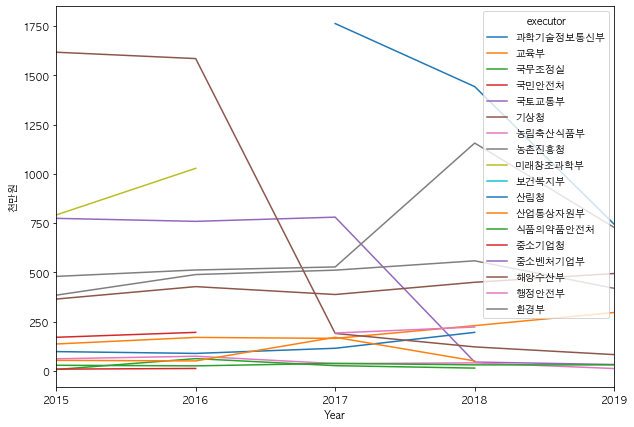

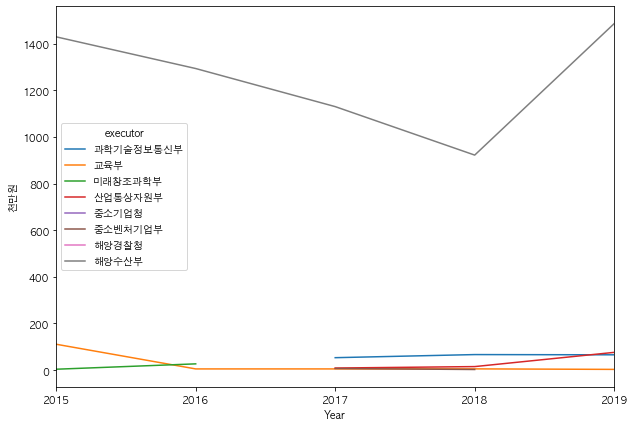

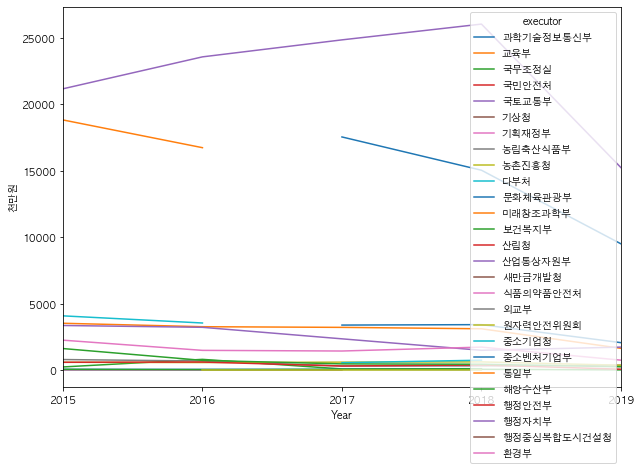

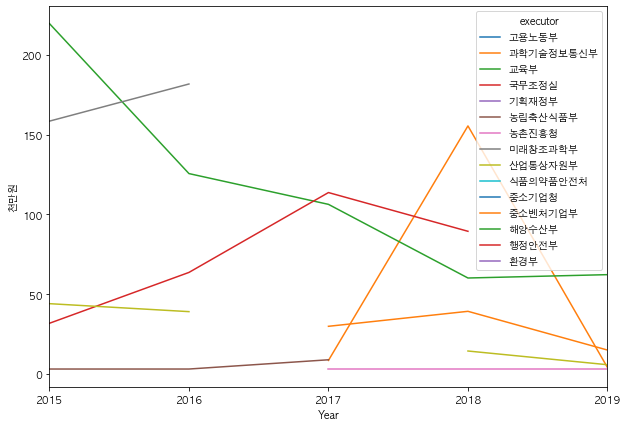

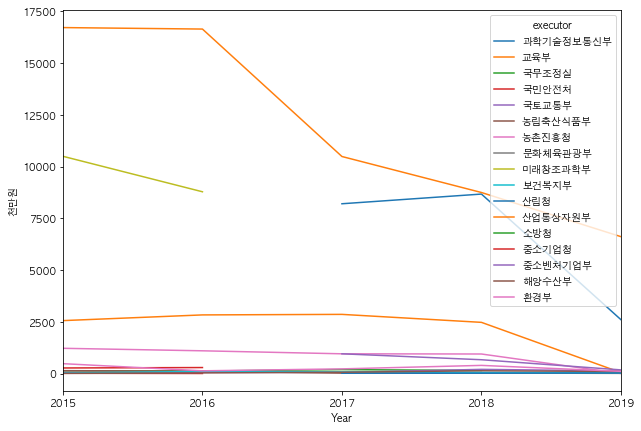

In [26]:
for i in range(len(clean_data)):
    name_ext = 'figures/'+"".join((namelist[i], ".png"))
    fig, ax = plt.subplots(figsize=(10,7))
    plt.ylabel('천만원')
    plt.xlabel('년도')
    pics = clean_data[i].groupby(['Year','executor']).sum()['amount'].unstack().plot(ax=ax)
    pics.figure.savefig(name_ext)

## Create piechart

In [49]:
clean_data2=list()
convert_dict = {'Year': str, 
                'amount': int
               }
for i in range(len(input_files)):
    x = data_list[i].astype(convert_dict)
    for i, row in x.iterrows():
        x.loc[i,'amount'] = round(row['amount']/10000000,1)
        x.loc[i,'Year']= datetime.datetime.strptime(row['Year'], '%Y')
    clean_data2.append(x.groupby(['executor']).sum())

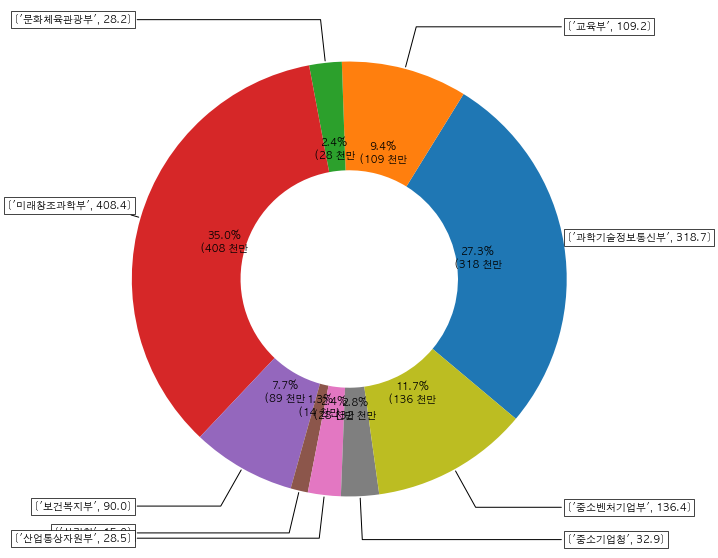

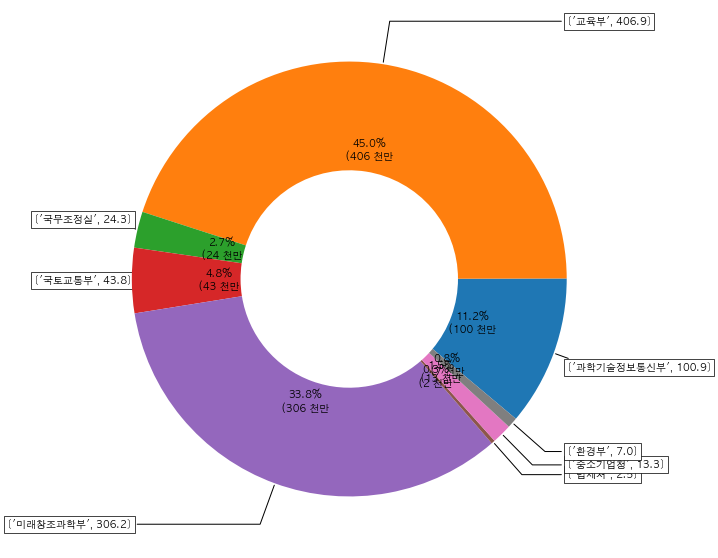

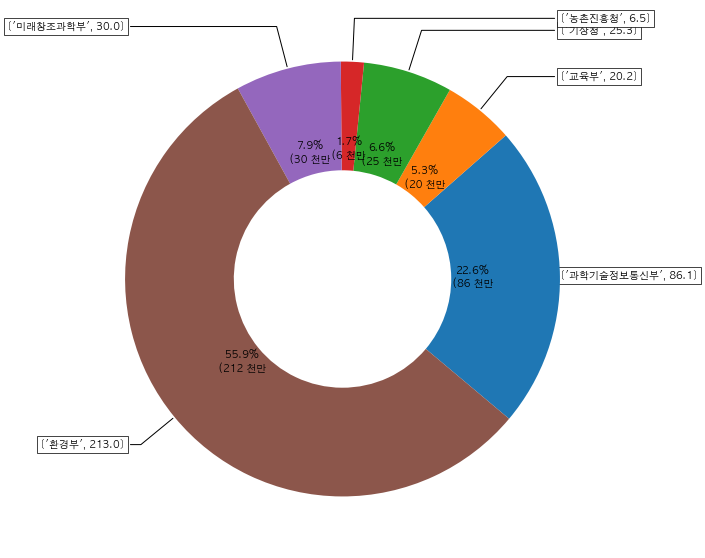

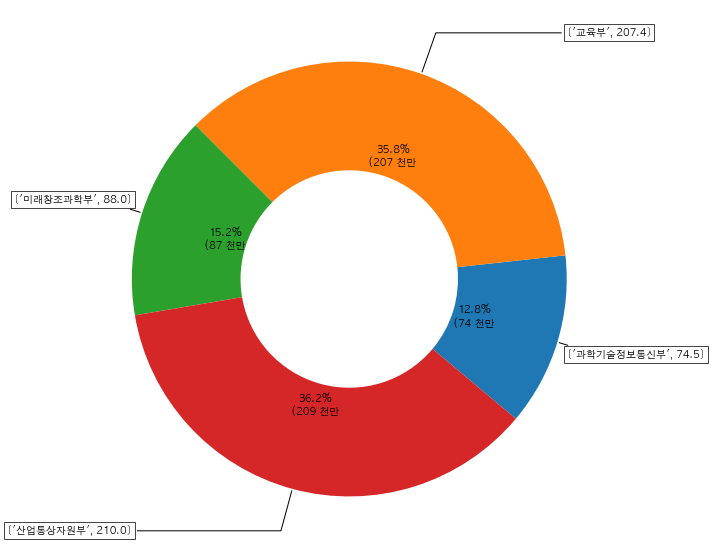

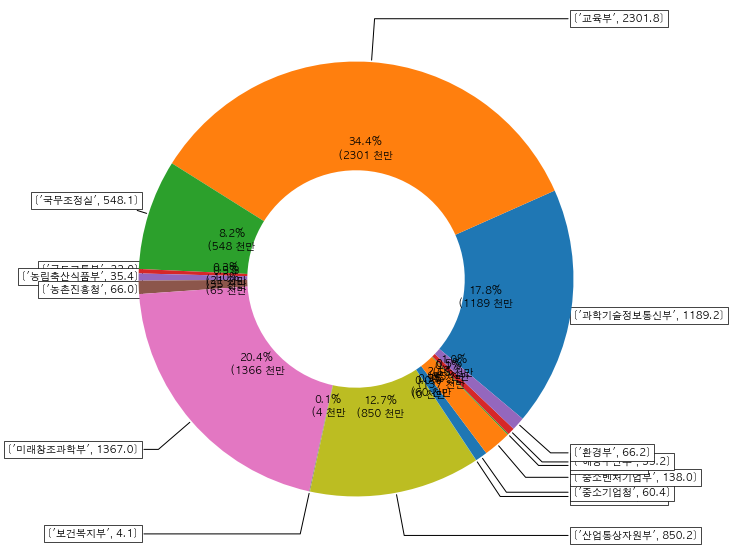

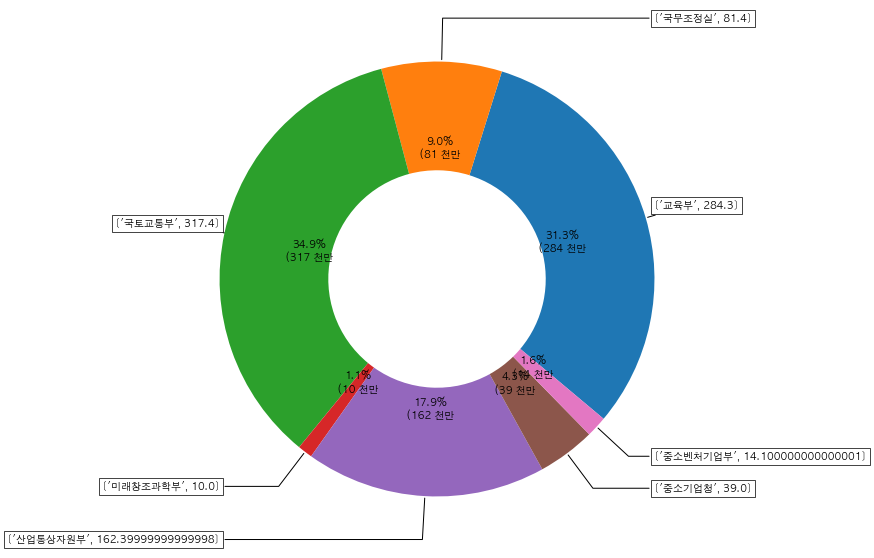

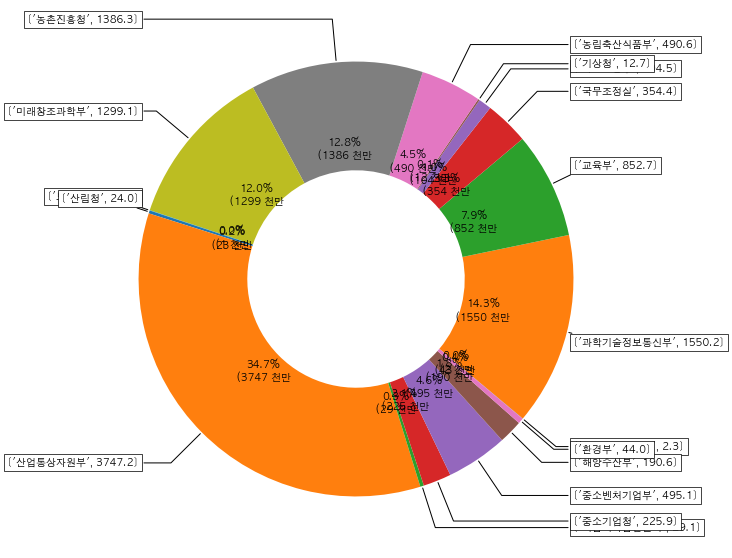

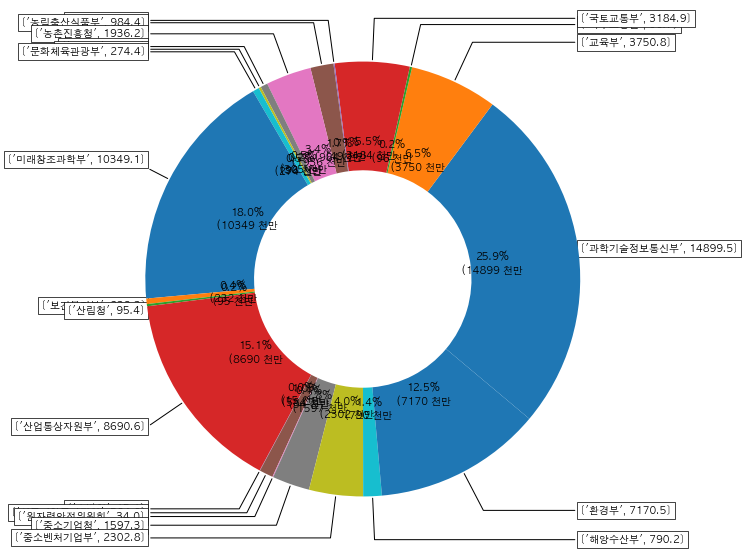

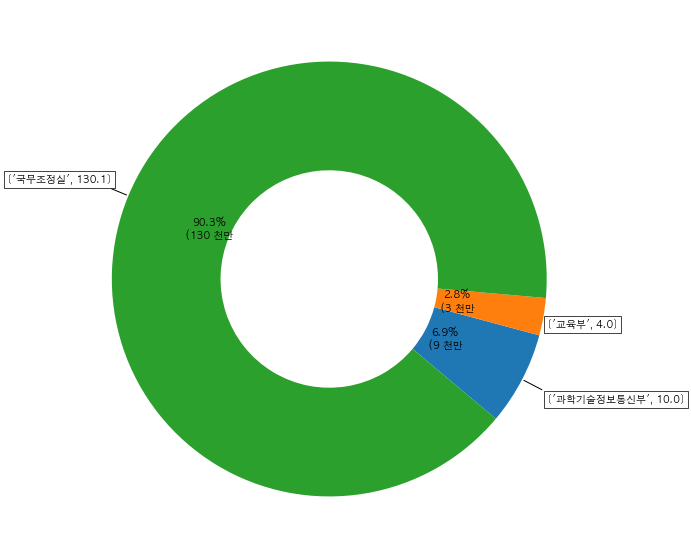

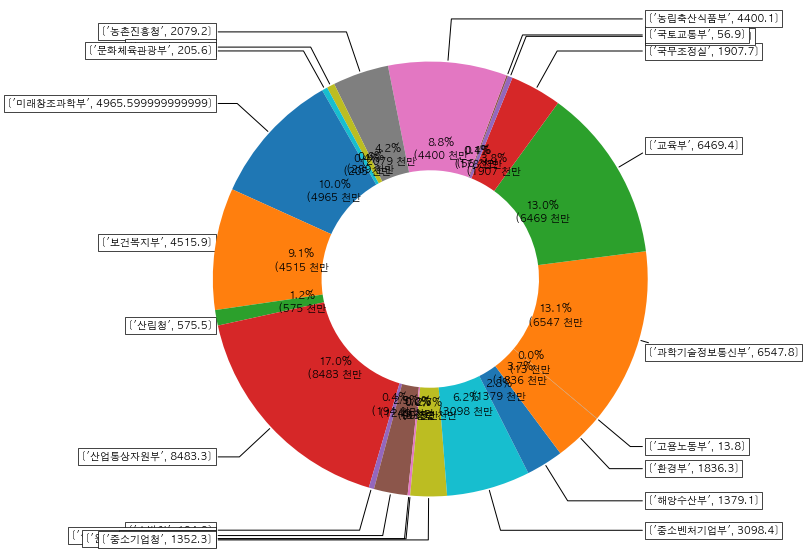

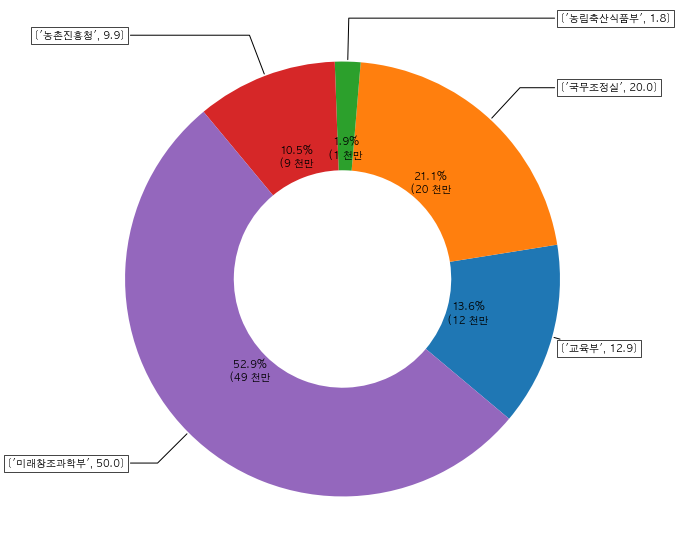

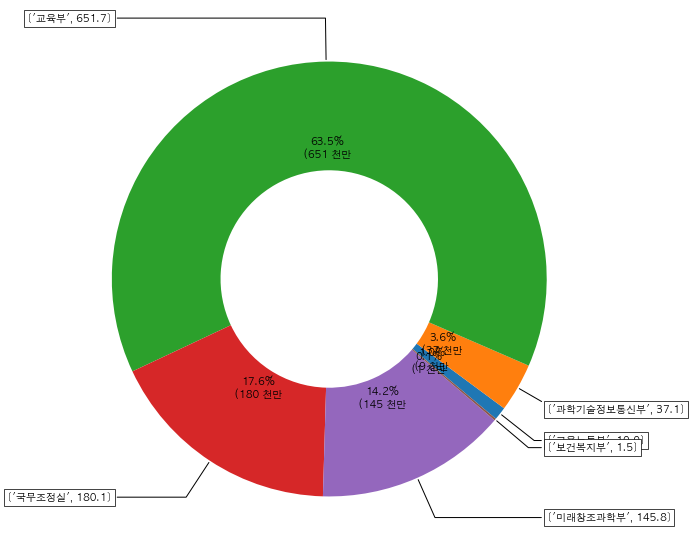

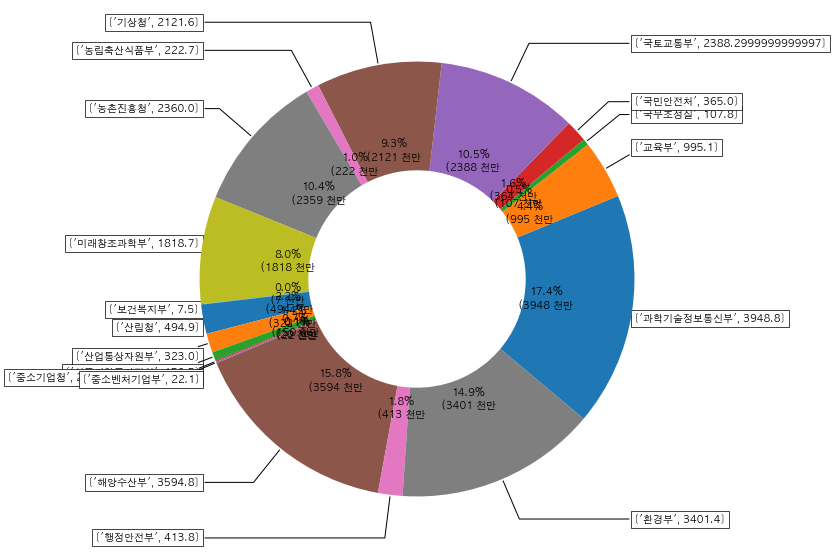

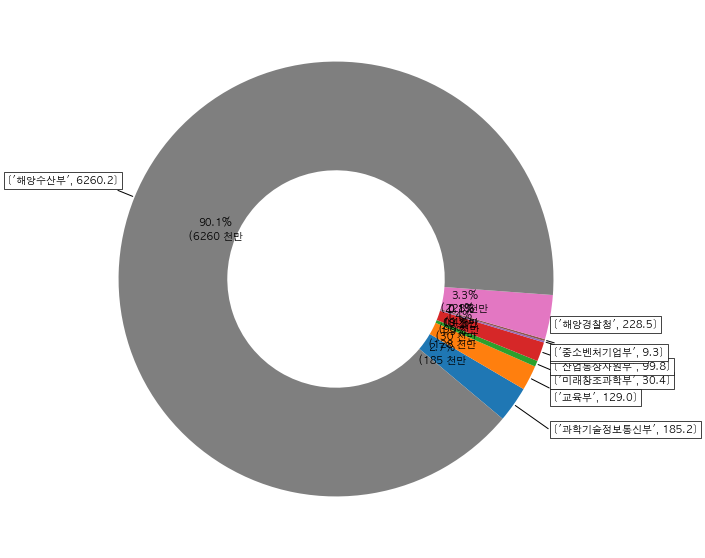

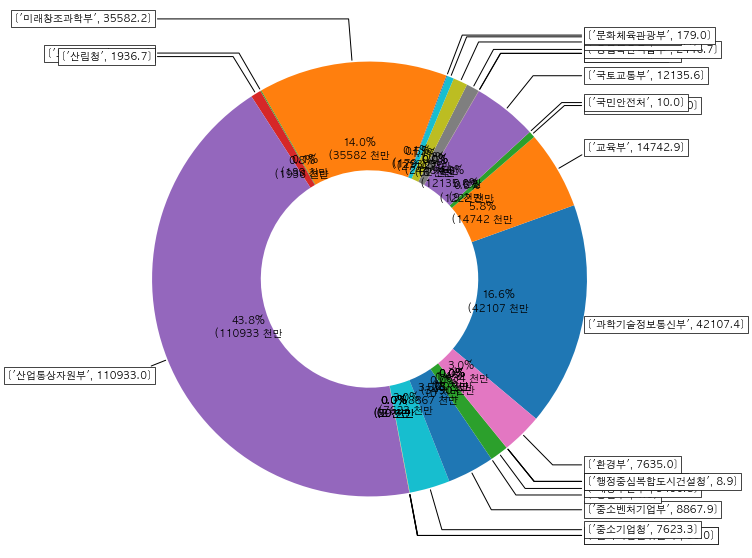

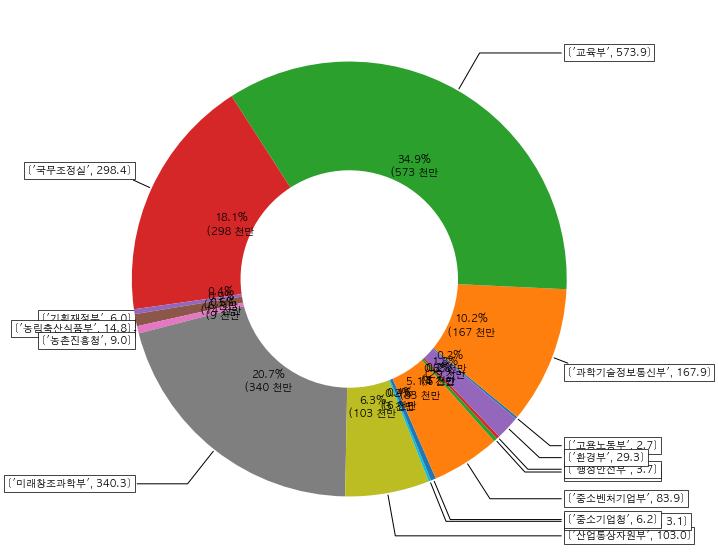

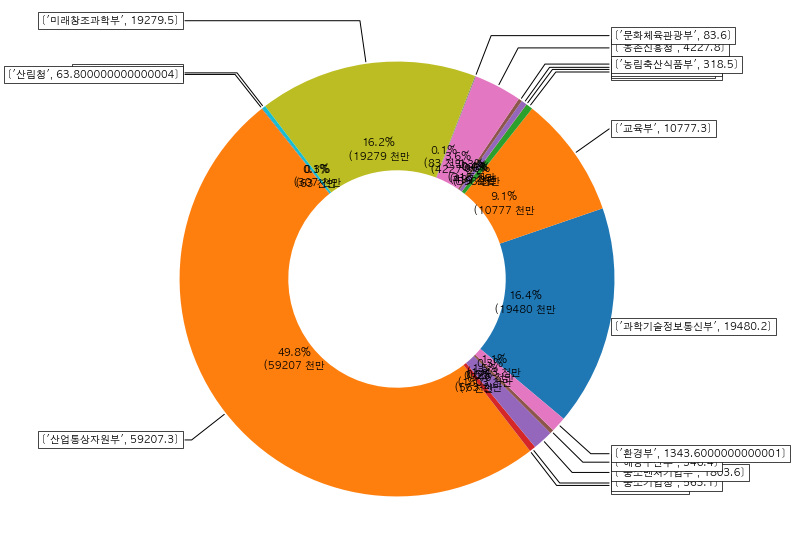

In [31]:
for z in range(len(clean_data2)):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
    instnames = clean_data2[z].index
    data = clean_data2[z]["amount"]
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} 천만".format(pct, absolute)
    wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct=lambda pct: func(pct, data))
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate([instnames[i],data[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
    #ax.set_title(namelist[z])
    name_ext = 'piecharts/'+"".join((namelist[z], "_piechart.png"))
    plt.savefig(name_ext)

### Solution for overlapping labels 
= use legend

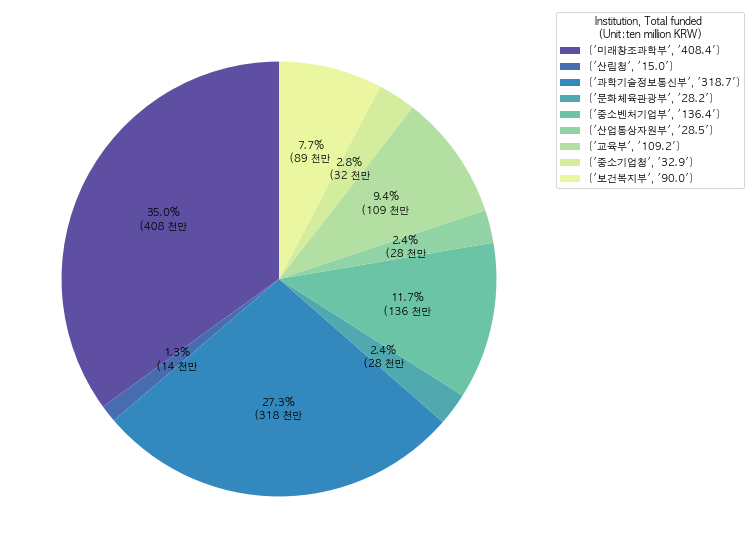

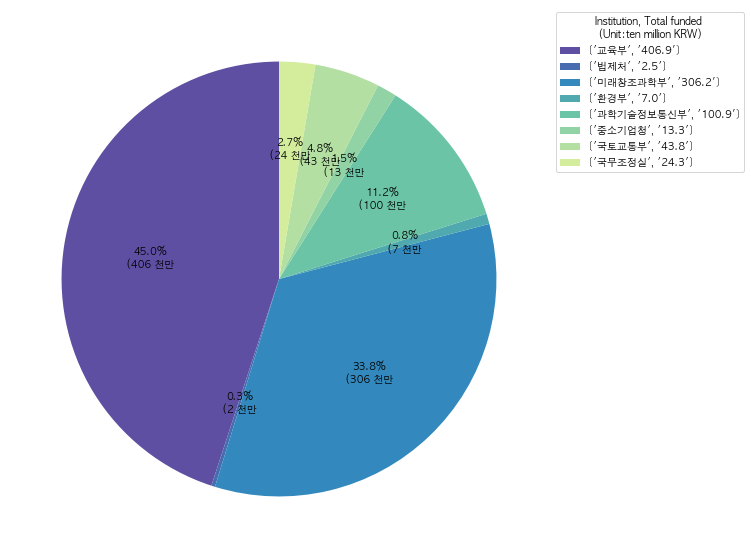

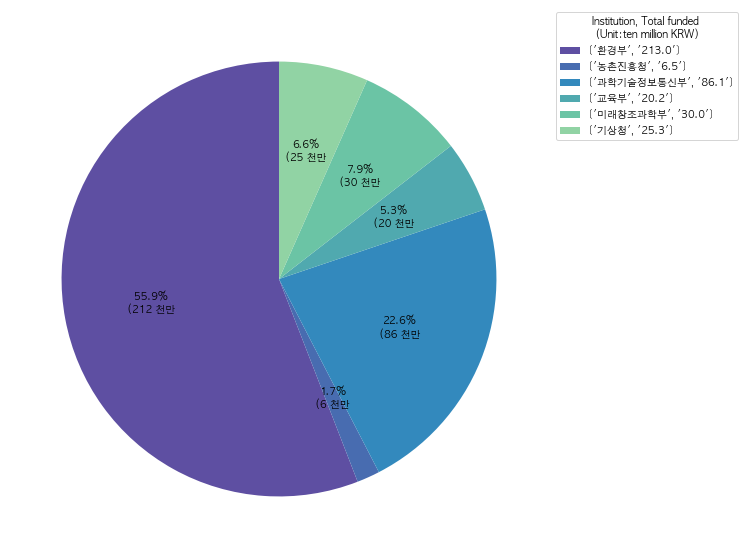

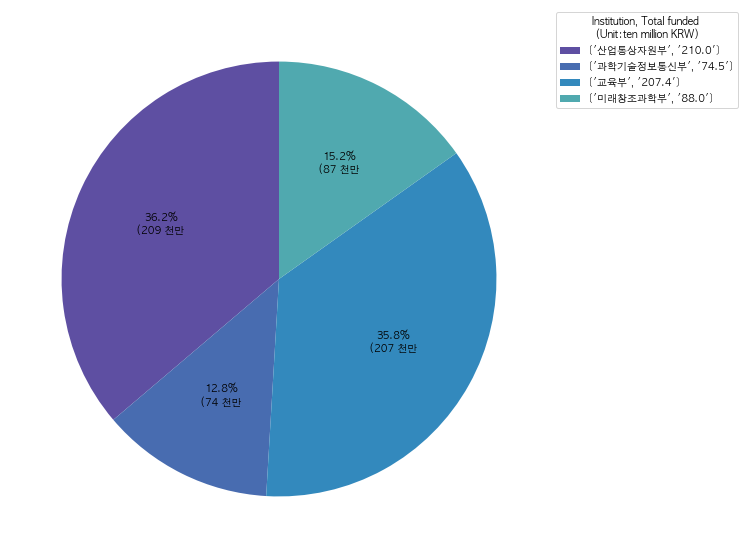

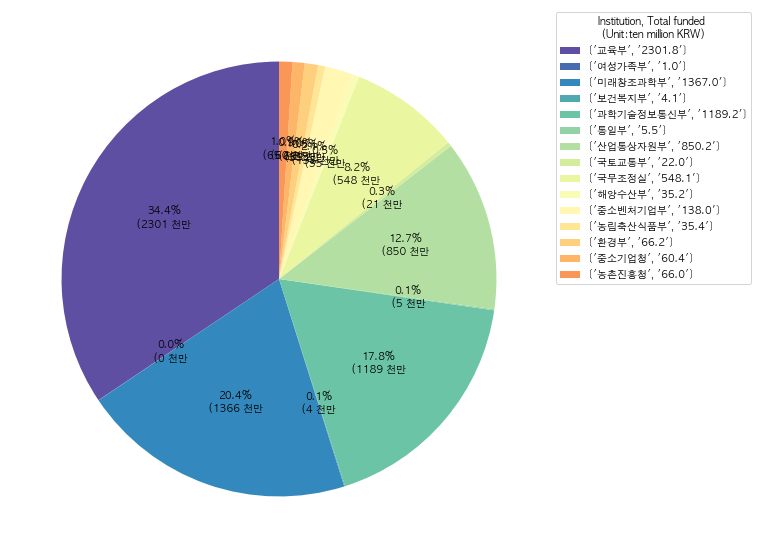

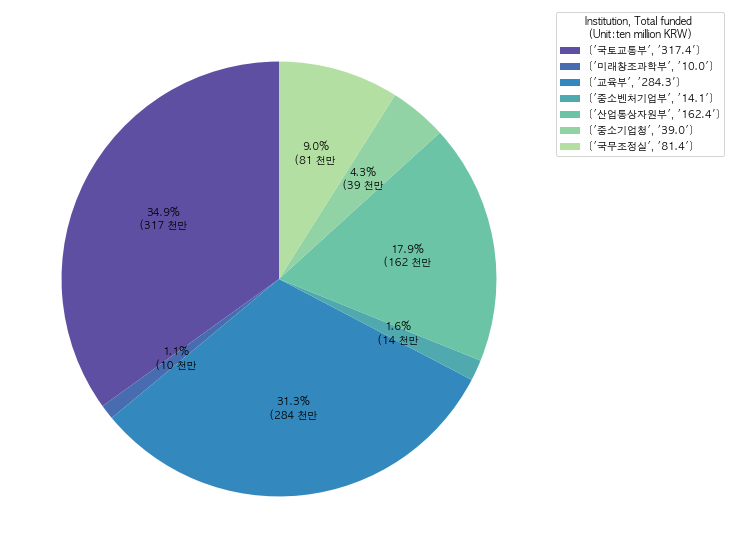

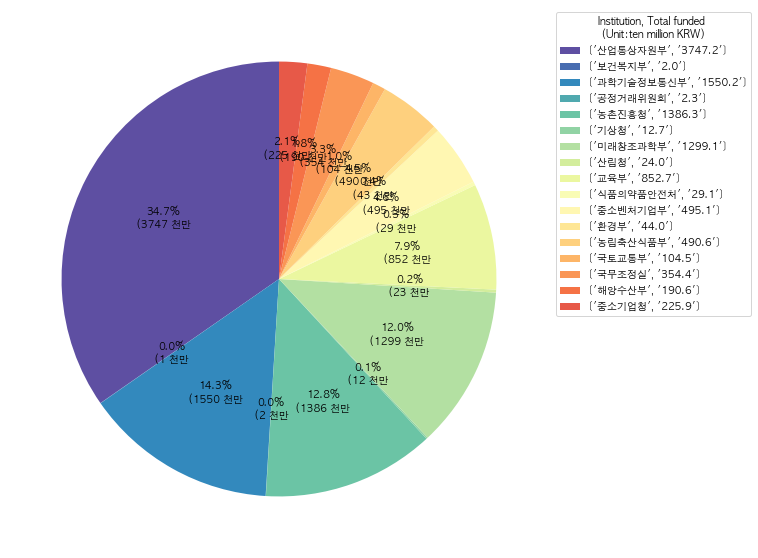

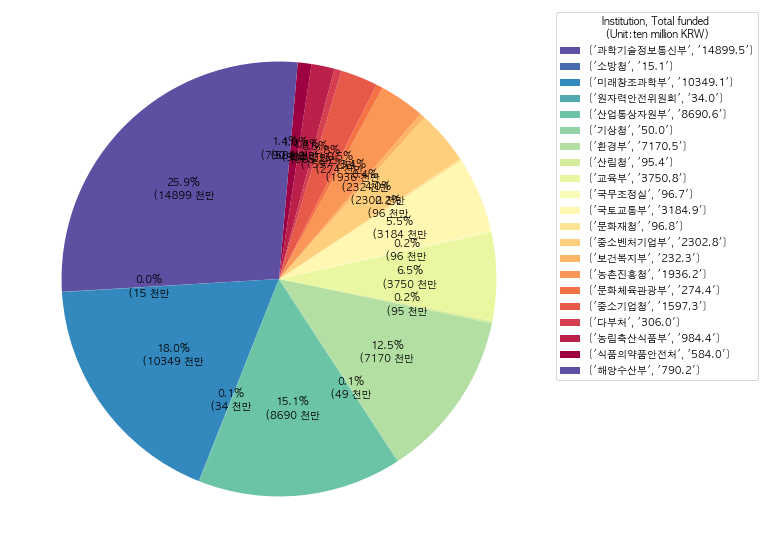

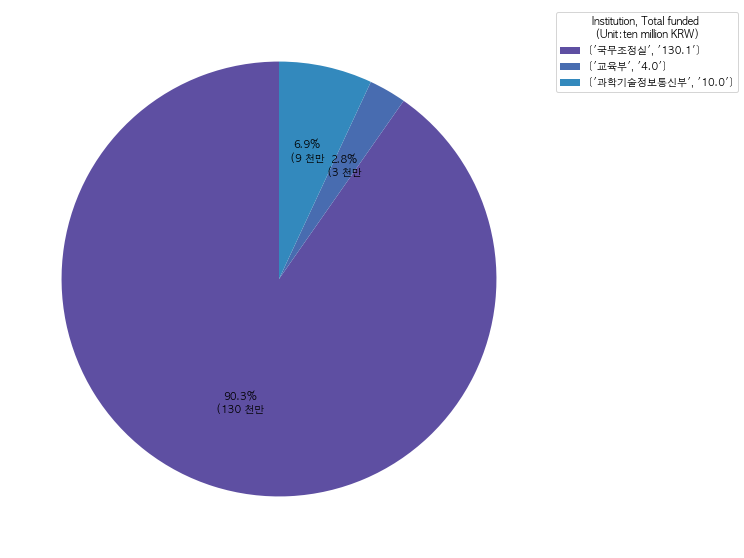

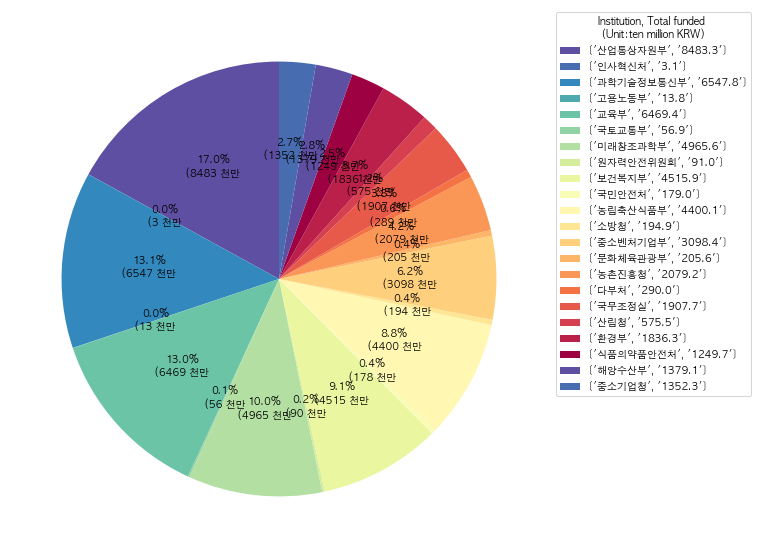

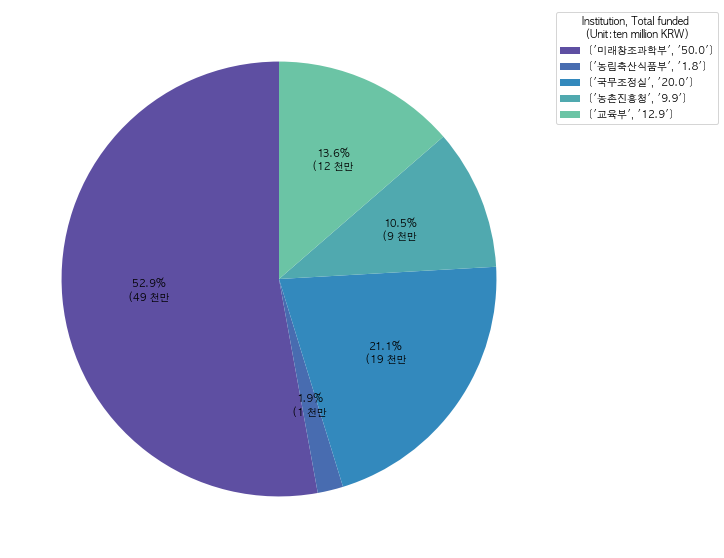

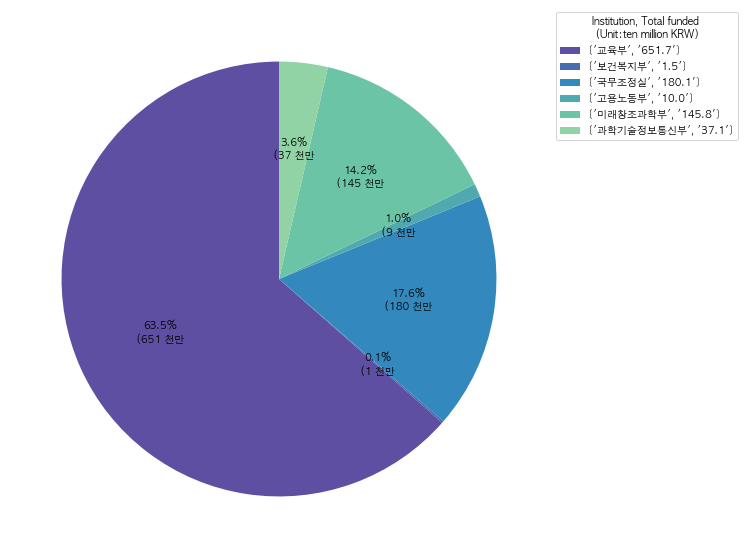

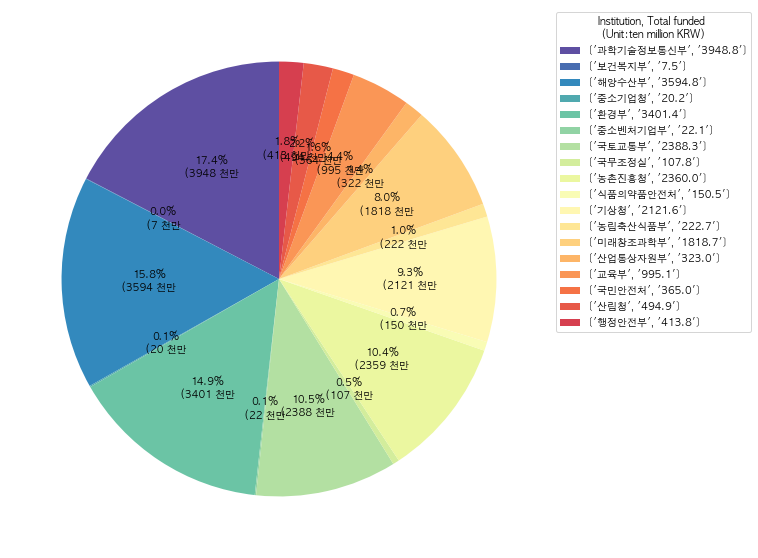

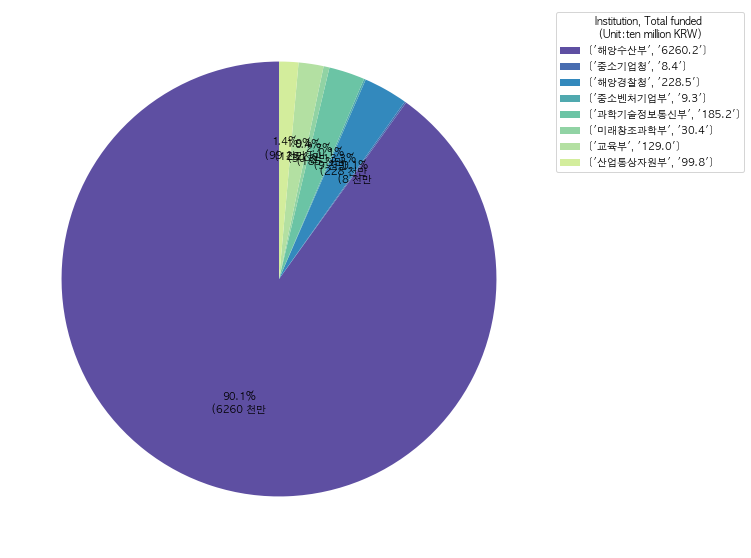

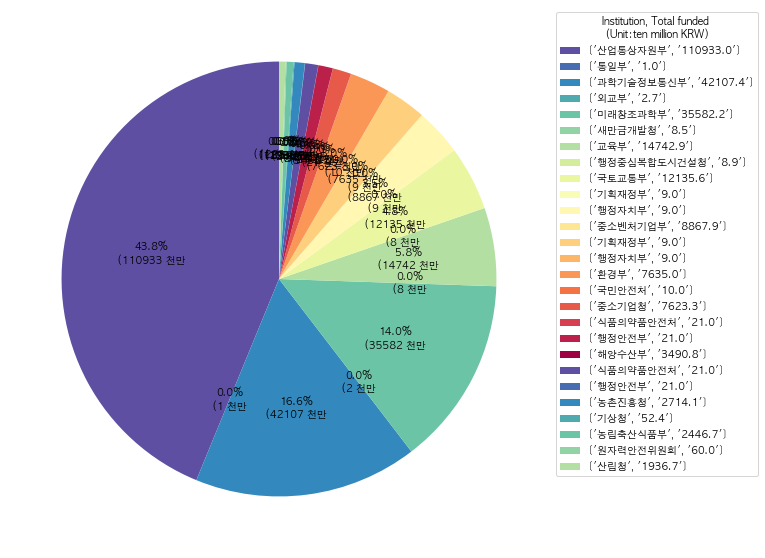

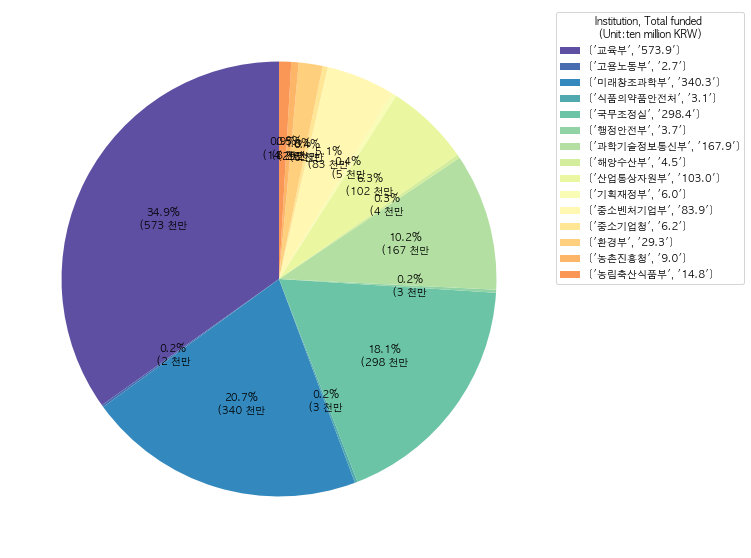

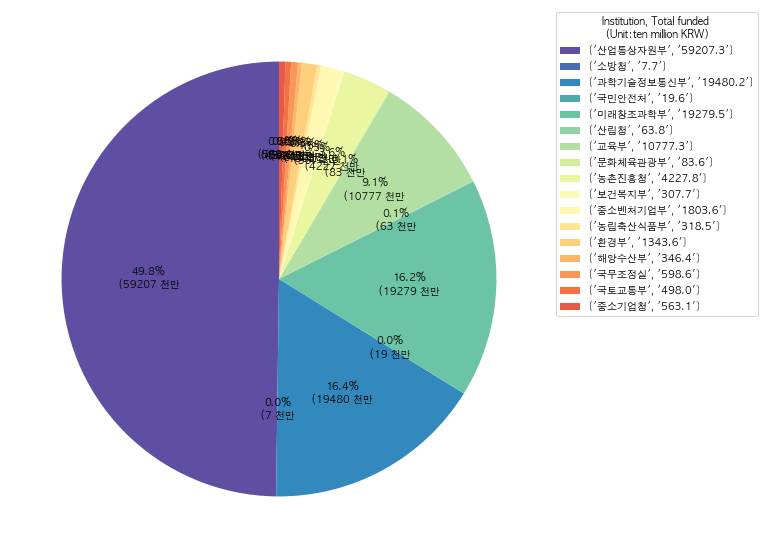

In [112]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(1, 0, 20)]

for z in range(len(clean_data2)):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
    
    instnames = clean_data2[z].index
    data = clean_data2[z]["amount"]
    
    annotate_dict = {k:v for k,v in zip(instnames, data)}
    val = [[x,y] for x,y in zip(sorted(data, reverse=True),sorted(data))]
    values1 = sum(val, [])
    
    new_labels = []
    new_legends = []
    for v in values1[:len(data)]:
        for key, value in annotate_dict.items():
            if v == value:
                new_labels.append(key)
                new_legends.append([key,"{:.1f}".format(value)])
    
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} 천만".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(values1[:len(data)],labeldistance=1.2, startangle=90, autopct=lambda pct: func(pct, data), colors=colors)
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        # ax.annotate(new_labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
        #             horizontalalignment=horizontalalignment, **kw)
    
    legends = ""
    #ax.set_title(namelist[z])
    plt.legend(labels= new_legends, title= "Institution, Total funded \n (Unit:ten million KRW)" ,bbox_to_anchor=(1,1))
    name_ext = 'piecharts/'+"".join((namelist[z], "_piechart.png"))    
    plt.savefig(name_ext, bbox_inches='tight')